![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](shark-attacks.png)

<center>You can clone the repo of this project at <br>https://github.com/rihp/shark-attacks </center>

 <center><h1> PART II <br> Data analysis and hypothesis formulation</h1> </center>
 
 

In [6]:
# You should have an exported.csv file. 
# We generated it while following along the 'PART I' of this project. 
# Do you have it?
!ls
# If you don't, you can download the 'PART I' from: https://github.com/rihp/shark-attacks

analysis.ipynb	clean.ipynb   README.md
attacks.csv	exported.csv  shark-attacks.png


In [8]:
import pandas as pd
import random

# Loading the cleaned dataset as a dataframe
df = pd.read_csv('exported.csv')
df

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,OTHER / NOT KNOWN,Surfing
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y,Invalid,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Diving
6298,6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y,Invalid,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Diving
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y,Invalid,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Swimming
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y,Invalid,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,NOT SPECIFIED


In [9]:
df.columns

Index(['Unnamed: 0', 'CaseNum', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Sex', 'Injury', 'Fatal', 'Species', 'Source',
       'href', 'Species2', 'Activity2'],
      dtype='object')

dtype('O')

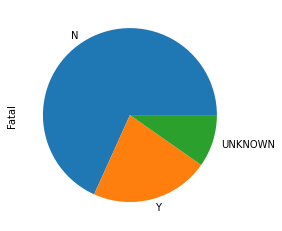

In [31]:
%matplotlib inline
# df1 = df.Species.value_counts()
s_fatal = df.Fatal.value_counts()

#
plot = s_fatal.plot.pie()

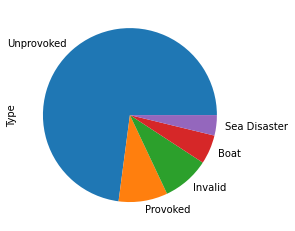

In [32]:
df.Type.value_counts().plot.pie()